In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import plotly
import datetime

In [19]:
df1=pd.read_csv(r'C:\Users\rudra\Desktop\Learnings\Python\covid19_tweets.csv')

In [20]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102601 entries, 0 to 102600
Data columns (total 13 columns):
user_name           102601 non-null object
user_location       81775 non-null object
user_description    96813 non-null object
user_created        102601 non-null object
user_followers      102601 non-null int64
user_friends        102601 non-null int64
user_favourites     102601 non-null int64
user_verified       102601 non-null bool
date                102601 non-null object
text                102601 non-null object
hashtags            73065 non-null object
source              102574 non-null object
is_retweet          102601 non-null bool
dtypes: bool(2), int64(3), object(8)
memory usage: 8.8+ MB


In [22]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_followers,102601.0,101810.529303,802721.184782,0.0,171.0,984.0,5229.0,13892841.0
user_friends,102601.0,2173.201908,9607.486075,0.0,156.0,555.0,1764.0,497363.0
user_favourites,102601.0,15041.071832,45864.187590,0.0,226.0,1905.0,9897.0,2047197.0


In [23]:
df1.head(2)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False


In [25]:
per_Null_hashtags=(df1['hashtags'].isna().sum()/df1['hashtags'].count())*100


In [26]:
print('{} percent hashtags is null'.format(per_Null_hashtags))

40.42427975090673 percent hashtags is null


In [27]:
df1['hashtags'].isna().value_counts()

False    73065
True     29536
Name: hashtags, dtype: int64

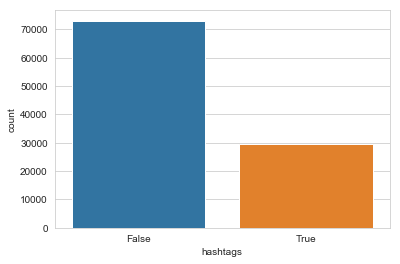

In [28]:
sns.countplot(df1['hashtags'].isna())

In [29]:
df1['user_verified'].value_counts()

False    89563
True     13038
Name: user_verified, dtype: int64

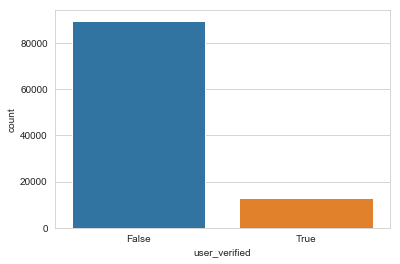

In [30]:
sns.countplot(df1['user_verified'])

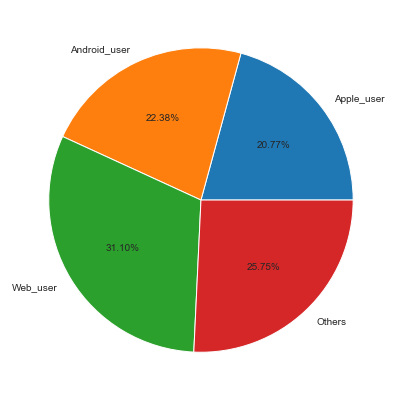

In [39]:
df1['source'].nunique()
df1['source'].isna().value_counts()
Apple_user = df1[df1['source']=='Twitter for iPhone']['source'].count()
Android_user = df1[df1['source']=='Twitter for Android']['source'].count()
Web_user = df1[df1['source']=='Twitter Web App']['source'].count()
others = df1[(df1['source']!= 'Twitter for iPhone') & (df1['source']!='Twitter for Android')& (df1['source']!='Twitter Web App')
            ]['source'].count()
plt.figure(figsize=(7,7))
labels =['Apple_user','Android_user','Web_user','Others']
plt.pie([Apple_user,Android_user,Web_user,others],labels=labels,autopct='%1.2f%%')
plt.show()




In [44]:
user_name=df1.groupby('user_name')['user_location'].count().reset_index()
user_name.columns=['user_name','count']
user_name.sort_values(['count'],inplace=True)


Text(0.5, 1.0, 'Top 20 users with Max Tweet')

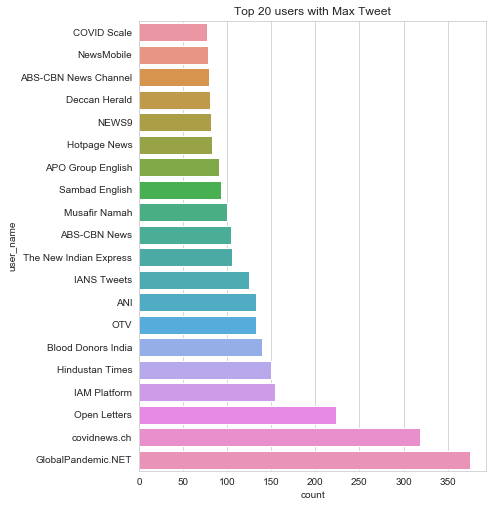

In [50]:
plt.figure(figsize=(7,7))
sns.barplot(x='count',y='user_name',data=user_name.tail(20),orient='h')
plt.tight_layout()
plt.title('Top 20 users with Max Tweet')

In [56]:
user_location=df1.groupby('user_location')['user_name'].count().reset_index()
user_location.columns=['user_location','count']
user_location.sort_values(['count'],inplace=True)

Text(0.5, 1.0, 'Top 20 Locations with Max Tweet')

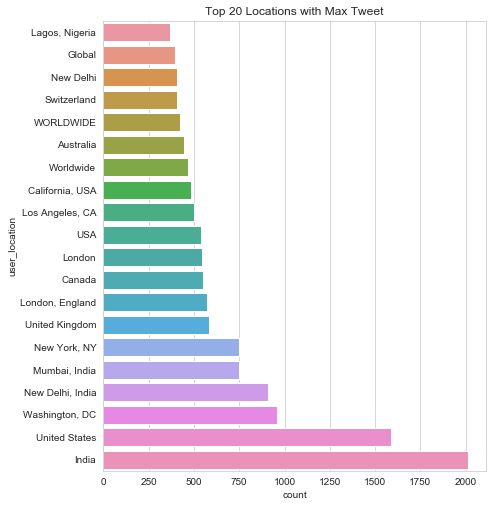

In [57]:
plt.figure(figsize=(7,7))
sns.barplot(x='count',y='user_location',data=user_location.tail(20),orient='h')
plt.tight_layout()
plt.title('Top 20 Locations with Max Tweet')

In [65]:
df1["date"] = pd.to_datetime(df1["date"])
time = df1['date'].iloc[0]
time.hour

12

In [71]:
df1['Month']=df1['date'].apply(lambda x : x.month)
df1['day']= df1['date'].apply(lambda x: x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df1['day']= df1['day'].map(dmap)

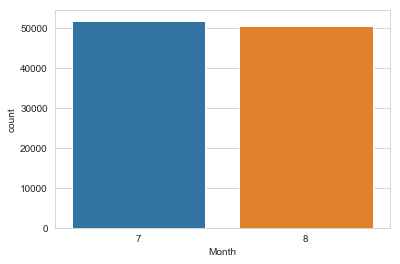

In [72]:
sns.countplot(df1['Month'])

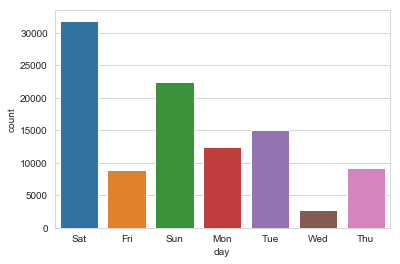

In [73]:
sns.countplot(df1['day'])